# Proyecto consta de analizar la salida del Autoencoder creado en 03_01_00 

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from scipy.stats import norm 

from models.Autoencoder import  Autoencoders
from utils.loaders import load_mnist, load_model

In [17]:
# Variational Auto Encoder Analysis

SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME= 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

## lectura de datos de entrenamiento

In [18]:
(x_train, y_train) ,  (x_test, y_test) = load_mnist()

## Lectura the el modelo desarrollado en  03_01_autoencoder

In [19]:
autoencoder = load_model(Autoencoders, RUN_FOLDER)

## reconstruccion de dibujos (numeros) al azar
En esta etapa se procede a extraer al azar N elementos y compararlos con su imagen de entrada

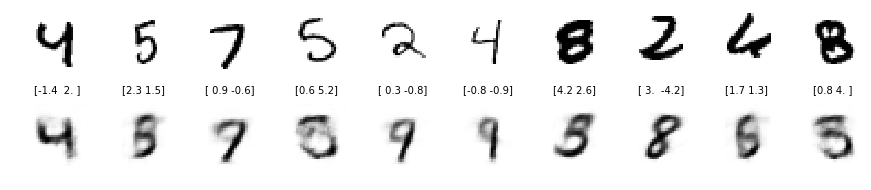

In [20]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = autoencoder.encoder.predict(example_images)

reconst_images = autoencoder.decoder.predict(z_points)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img= reconst_images[i].squeeze()
    ax = fig.add_subplot(2,n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## como queda el mapa de la generacion de las imagenes en Test
Se procede a graficar cada punto o Z_point el cual representa a una imgen en particular

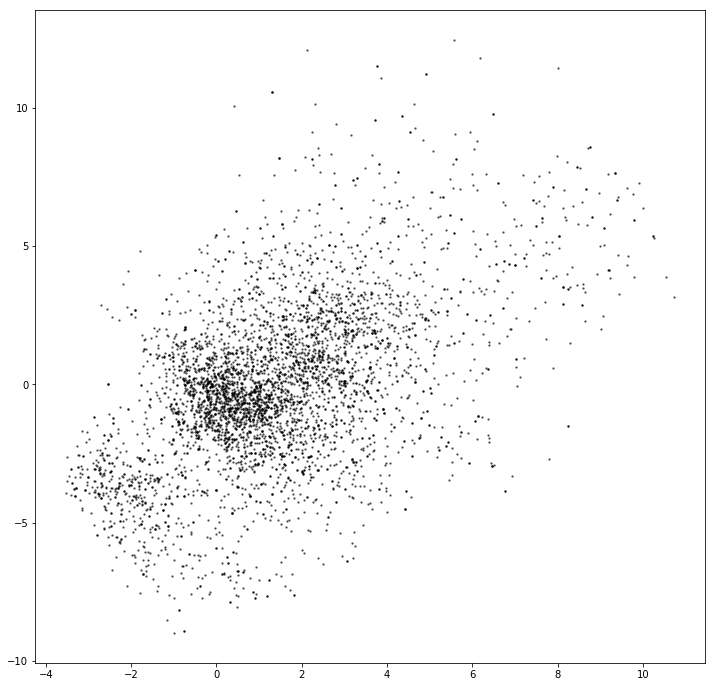

In [21]:
n_to_show = 5000 # cantidad de imagenes en test
grid_size = 15
figsize=12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = autoencoder.encoder.predict(example_images)

min_x = min(z_points[:,0])
max_x = max(z_points[:,0])
min_y = min(z_points[:,1])
max_y = max(z_points[:,1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:,0], z_points[:,1], c='black', alpha=0.5, s=2)
plt.show()

## Reconstruccion de numeros al Azar
Sobre el mapa aterior se procede a seleccionar al azar distintos puntos del mapa y graficar como seria su generacion de imagenes



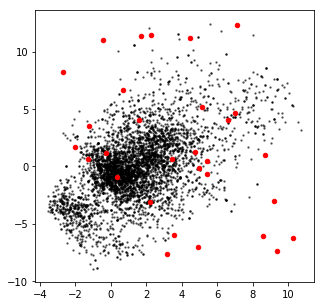

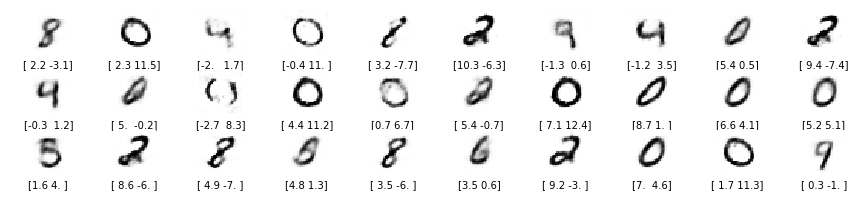

In [22]:
figsize= 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:,0], z_points[:,1], c ='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3

figsize=15

x = np.random.uniform(min_x, max_x, size=grid_size*grid_depth)
y = np.random.uniform(min_y, max_y, size=grid_size*grid_depth)

z_grid =np.array(list(zip(x,y)))

reconst = autoencoder.decoder.predict(z_grid)

plt.scatter(z_grid[:,0], z_grid[:,1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth,grid_size, i+1)
    ax.axis('off')
    ax.text(0.5,-0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform= ax.transAxes)
    ax.imshow(reconst[i,:,:,0], cmap='Greys')

## como se encuentra distribuido los labels (numeros) en el mapa completo?

Vamos a utilizar los categoria o Labels del dataset par ver como se encuentra la distribución de las distintas clases

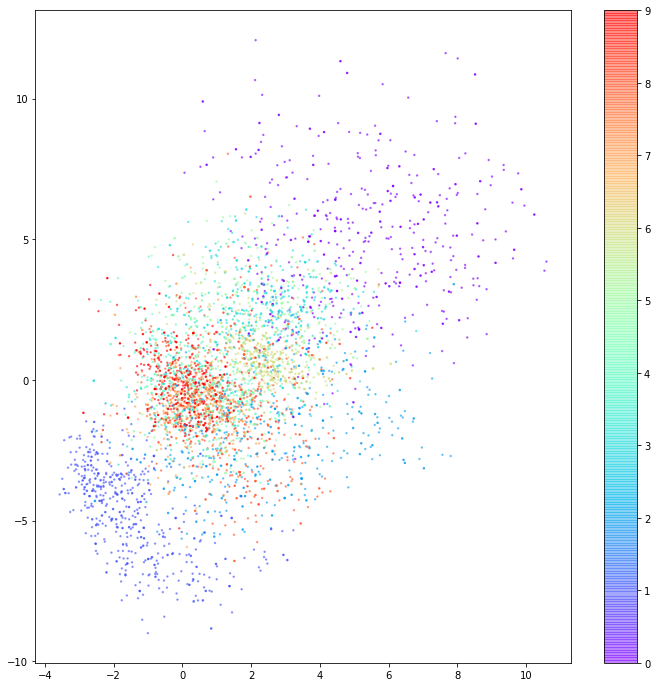

In [23]:
n_to_show = 5000
grid_size = 15
figsize=12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = autoencoder.encoder.predict(example_images)
plt.figure(figsize=(figsize,figsize))
plt.scatter(z_points[:,0], z_points[:,1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()
plt.show()


## distribucion de cada numero

Vamos dividir el grafico equi espacial para observar como es la separacion de las clasesm

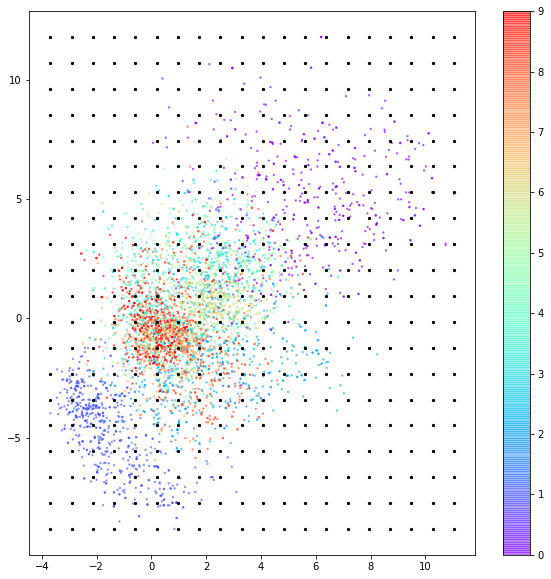

In [31]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = autoencoder.encoder.predict(example_images)

plt.figure(figsize=(10,10))
plt.scatter(z_points[:,0], z_points[:,1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

x = np.linspace(min(z_points[:,0]), max(z_points[:,0]), grid_size)
y = np.linspace(min(z_points[:,1]), max(z_points[:,1]),grid_size)

xv ,xy = np.meshgrid(x,y)
xv = xv.flatten()
yv = xy.flatten()

z_grid = np.array(list(zip(xv,yv)))

reconst = autoencoder.decoder.predict(z_grid)

plt.scatter(z_grid[:,0], z_grid[:,1], c='black',alpha=1, s=5)

plt.show()




## De igual manera vamos a visualizar todos los cambios de un conjunto de imagenes decodificadas

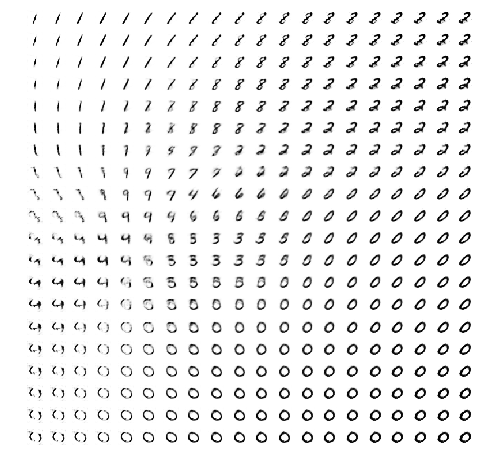

In [32]:
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size,i+1)
    ax.axis('off')
    ax.imshow(reconst[i,:,:,0], cmap='Greys')

plt.show()